In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing datasets
data = pd.read_csv("../datasets/Workexo.csv", usecols = ['JobInvolvement', 'Department','HourlyRate', 'StandardHours','PerformanceRating'])

data=data.reindex(columns=['Department','JobInvolvement', 'HourlyRate', 'StandardHours','PerformanceRating'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
Department           1470 non-null object
JobInvolvement       1470 non-null int64
HourlyRate           1470 non-null int64
StandardHours        1470 non-null int64
PerformanceRating    1470 non-null int64
dtypes: int64(4), object(1)
memory usage: 57.5+ KB


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
Department           1470 non-null object
JobInvolvement       1470 non-null int64
HourlyRate           1470 non-null int64
StandardHours        1470 non-null int64
PerformanceRating    1470 non-null int64
dtypes: int64(4), object(1)
memory usage: 57.5+ KB


In [5]:
data.head()

,Department,JobInvolvement,HourlyRate,StandardHours,PerformanceRating
0,Sales,3,94,80,3
1,Research & Development,2,61,80,4
2,Research & Development,2,92,80,3
3,Research & Development,3,56,80,3
4,Research & Development,3,40,80,3


In [6]:
#distributiOneHotEncoderng independent and dependent variables
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [7]:
print(X)

[['Sales' 3 94 80]
 ['Research & Development' 2 61 80]
 ['Research & Development' 2 92 80]
 ...
 ['Research & Development' 4 87 80]
 ['Sales' 2 63 80]
 ['Research & Development' 4 82 80]]


In [8]:
#Integer Encoding of Department type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:,0] = label_encoder.fit_transform(X[:,0])
X = X.astype(np.int64)

In [9]:
#Independent variable after Integer Encoding
print(X)

[[ 2  3 94 80]
 [ 1  2 61 80]
 [ 1  2 92 80]
 ...
 [ 1  4 87 80]
 [ 2  2 63 80]
 [ 1  4 82 80]]


In [10]:
#Splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
#FItting logistic regresion model in the Training Set
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression()
clf_LR.fit(X_train,y_train)

#Predicting the Test Set Results
y_LR = clf_LR.predict(X_test)

print(clf_LR.score(X_test, y_test))

0.8342391304347826


In [12]:
#FItting RandomForestClassifier model in the Training Set
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 20, criterion = "entropy")
clf_RF.fit(X_train, y_train)

#Predicting the Test Set Results
y_RF = clf_RF.predict(X_test)

print(clf_RF.score(X_test, y_test))

0.779891304347826


In [13]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(criterion = 'entropy')
clf_DT.fit(X_train, y_train)

#Predicting the Test Set Results
y_DT = clf_DT.predict(X_test)

print(clf_DT.score(X_test, y_test))

0.7907608695652174


In [14]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
clf_KNN.fit(X_train, y_train)

#Predicting the Test Set Results
y_KNN = clf_KNN.predict(X_test)

print(clf_KNN.score(X_test, y_test))



0.8179347826086957


<IPython.core.display.Javascript object>


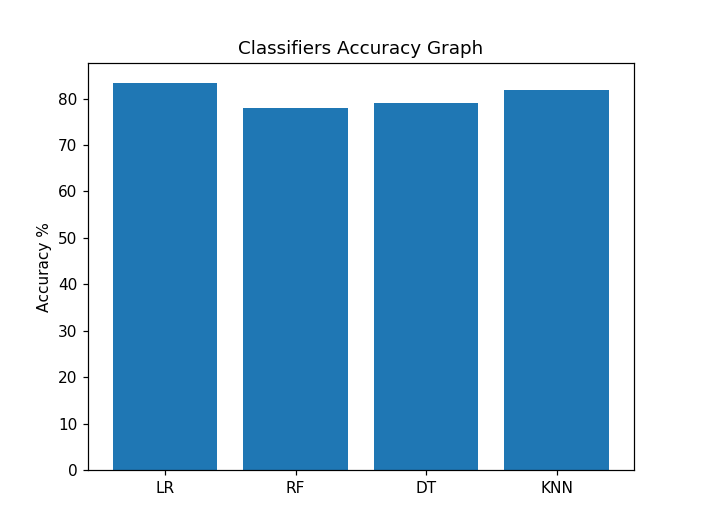

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt;

 
objects = ('LR', 'RF', 'DT', 'KNN')
y_pos = np.arange(len(objects))
performance = [clf_LR.score(X_test, y_test)*100,clf_RF.score(X_test, y_test)*100,clf_DT.score(X_test, y_test)*100,clf_KNN.score(X_test, y_test)*100]
 
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Classification Model')
plt.ylabel('Accuracy %')
plt.title('Classifiers Accuracy Graph')
 
plt.show()